In [74]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf 
from scipy.interpolate import interp1d
import seaborn.objects as so
from scipy.stats import chisquare
import pylab 
import scipy.stats as stats
from scipy.stats import norm

In [28]:
cancellations_scotland_fp = os.path.join(os.getcwd(), "datasets", "cancellations_in_scotland.csv")
cancellations_scotland = pd.read_csv(cancellations_scotland_fp)

In [29]:
cancellations_scotland.isna().sum()

_id                              0
Month                            0
Country                          0
TotalOperations                  0
TotalOperationsQF              105
TotalCancelled                   0
TotalCancelledQF               105
CancelledByPatientReason         0
CancelledByPatientReasonQF     105
ClinicalReason                   0
ClinicalReasonQF               105
NonClinicalCapacityReason        0
NonClinicalCapacityReasonQF    105
OtherReason                      0
OtherReasonQF                  105
dtype: int64

In [30]:
# drop uncessary columns drop also country cos its only scotland and like everything is the same and id too cos like useless yk
cancellations_scotland.drop(columns=["_id","Country","TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)

In [31]:
cancellations_scotland.tail()


,Month,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
100,202309,23209,2105,739,738,541,87
101,202310,24201,2286,775,797,580,134
102,202311,25922,2277,737,820,582,138
103,202312,20837,2014,677,725,515,97
104,202401,24186,2425,830,739,668,188


In [32]:
cancellations_scotland["Month"] = pd.to_datetime(cancellations_scotland.Month, format="%Y%m")
# change the month format to a much better data type

In [33]:
cancellations_scotland

,Month,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,2015-05-01,28810,2695,1057,853,523,262
1,2015-06-01,30941,2800,1194,870,449,287
2,2015-07-01,27725,2642,1083,854,457,248
3,2015-08-01,28948,2630,1080,912,491,147
4,2015-09-01,30938,2829,1122,1000,535,172
...,...,...,...,...,...,...,...
100,2023-09-01,23209,2105,739,738,541,87
101,2023-10-01,24201,2286,775,797,580,134
102,2023-11-01,25922,2277,737,820,582,138
103,2023-12-01,20837,2014,677,725,515,97


In [34]:
# change a column to a much more suitable name
cancellations_scotland.rename(columns={"Month":"Date"}, inplace=True)

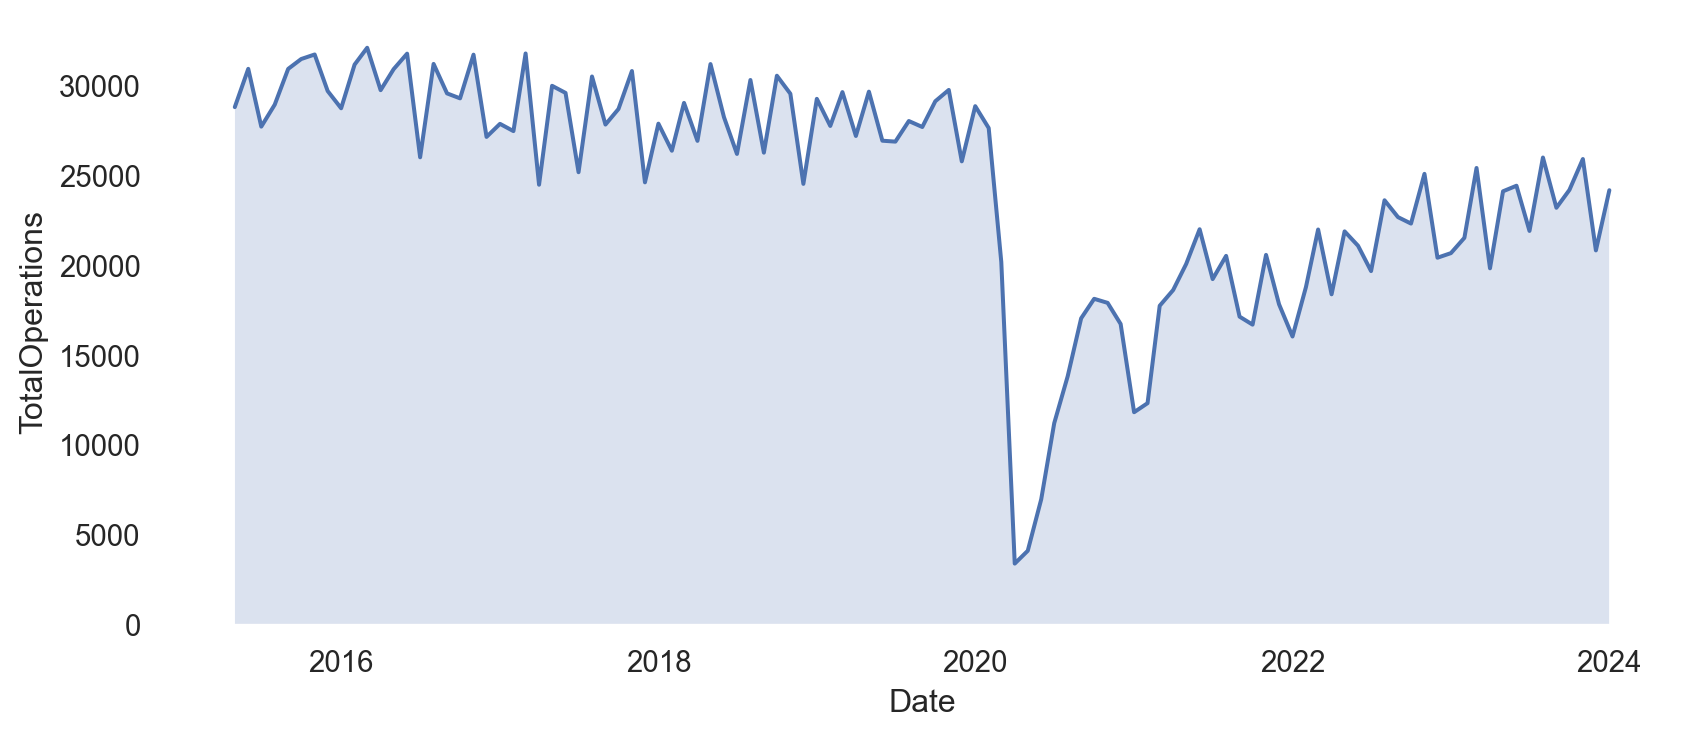

In [35]:
scot = so.Plot(cancellations_scotland, "Date", "TotalOperations").layout(size=(9, 4)).theme({"axes.facecolor": "w"})
scot.add(so.Area(edgewidth=0)).add(so.Line())

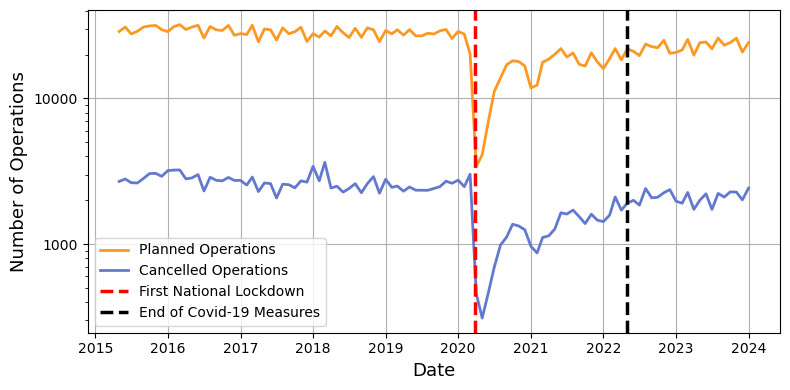

In [36]:
fig, ax = plt.subplots(figsize=(8,4))
# COLOURRR BLIND PALETTEEEE
sns.color_palette("tab10")
sns.lineplot(data=cancellations_scotland, x="Date", y="TotalOperations", label="Planned Operations", color = "#FB9922", linewidth=2)
sns.lineplot(data=cancellations_scotland, x="Date", y="TotalCancelled", label="Cancelled Operations", color="#6379CE", linewidth=2)
plt.ylabel("Number of Operations", fontsize=13)
ax.set(yscale="log")
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.axvline(x=np.datetime64("2020-03-26"), label="First National Lockdown", linestyle = "--", color = '#FF0000', linewidth = 2.5)
plt.axvline(x=np.datetime64("2022-04-30"), label="End of Covid-19 Measures", linestyle = "--", color = '000000', linewidth = 2.5)
plt.axhline(y=mean_operations_beforecovid, color='r', linestyle='-')
plt.axhline(y=mean_cancelled_beforecovid, color='r', linestyle='-')
plt.xlabel("Date", fontsize=13)
plt.tight_layout()
plt.legend()
ax.grid()
plt.savefig('figure1.pdf')

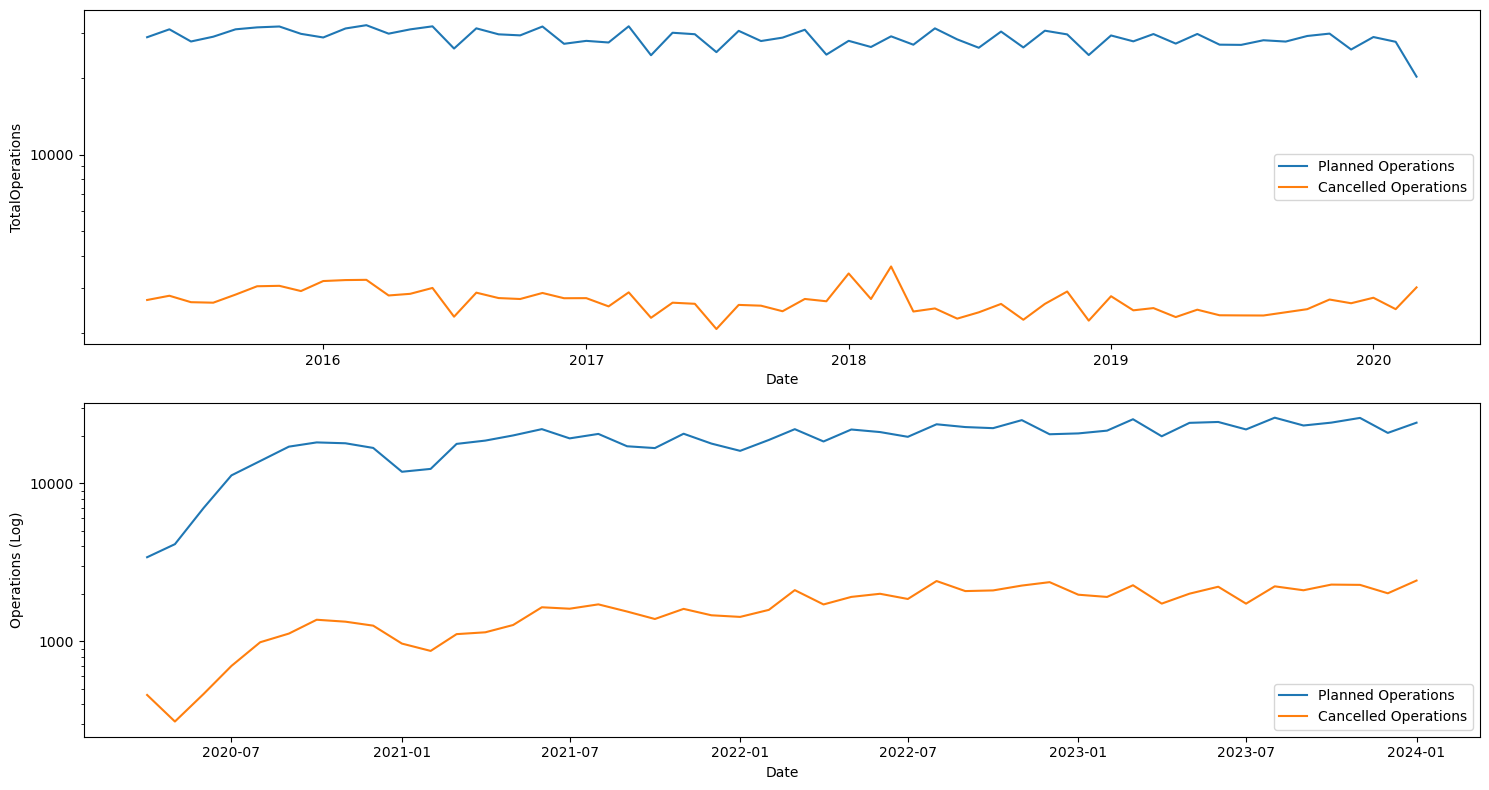

In [37]:
fig, axs = plt.subplots(2, figsize=(15,8))

plt.rc('axes', titlesize=8)     # fontsize of the axes title
plt.rc('axes', labelsize=10) 

#before covid
cancellations_scotland_beforecovid = cancellations_scotland[cancellations_scotland["Date"] <= np.datetime64("2020-03-26")]
sns.lineplot(ax=axs[0], data=cancellations_scotland_beforecovid, x="Date", y="TotalOperations", label="Planned Operations")
sns.lineplot(ax=axs[0], data=cancellations_scotland_beforecovid, x="Date", y="TotalCancelled", label="Cancelled Operations")
plt.ylabel("Operations (Log)")
axs[0].set(yscale="log")
axs[0].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

#after covid
cancellations_scotland_aftercovid = cancellations_scotland[cancellations_scotland["Date"] >= np.datetime64("2020-03-26")]
sns.lineplot(ax=axs[1], data=cancellations_scotland_aftercovid, x="Date", y="TotalOperations", label="Planned Operations")
sns.lineplot(ax=axs[1], data=cancellations_scotland_aftercovid, x="Date", y="TotalCancelled", label="Cancelled Operations")
plt.ylabel("Operations (Log)")
axs[1].set(yscale="log")
axs[1].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.tight_layout()
plt.legend()
plt.show()

In [38]:
def get_season(x):
    match x.month:
        case 12 | 1 | 2:
            return "Winter"
        case 3 | 4 | 5:
            return "Spring"
        case 6 | 7 | 8:
            return "Summer"
        case 9 | 10 | 11:
            return "Autumn"
        
cancel_scotland = cancellations_scotland.copy(True)
cancel_scotland["Season"] = cancellations_scotland["Date"].apply(get_season)
cancel_scotland


,Date,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Season
0,2015-05-01,28810,2695,1057,853,523,262,Spring
1,2015-06-01,30941,2800,1194,870,449,287,Summer
2,2015-07-01,27725,2642,1083,854,457,248,Summer
3,2015-08-01,28948,2630,1080,912,491,147,Summer
4,2015-09-01,30938,2829,1122,1000,535,172,Autumn
...,...,...,...,...,...,...,...,...
100,2023-09-01,23209,2105,739,738,541,87,Autumn
101,2023-10-01,24201,2286,775,797,580,134,Autumn
102,2023-11-01,25922,2277,737,820,582,138,Autumn
103,2023-12-01,20837,2014,677,725,515,97,Winter


In [39]:
#sns.barplot(data=cancel_scotland, x="Season", y="TotalCancelled")


In [40]:
#cancel_scotland["Cancelled/Planned"] = cancel_scotland["TotalCancelled"]/cancel_scotland["TotalOperations"]

In [41]:
#cancel_scotland

In [42]:
"""season_totalcancelled = cancel_scotland.groupby(["Season"]).sum()[["TotalCancelled","TotalOperations"]]
season_totalcancelled.reset_index(inplace=True)
season_totalcancelled"""

'season_totalcancelled = cancel_scotland.groupby(["Season"]).sum()[["TotalCancelled","TotalOperations"]]\nseason_totalcancelled.reset_index(inplace=True)\nseason_totalcancelled'

In [43]:
"""season_totalcancelled_aut = pd.DataFrame({"Season":["Autumn","Others"], "TotalCancelled":[], "TotalOperations":[]})
season_totalcancelled_aut"""

'season_totalcancelled_aut = pd.DataFrame({"Season":["Autumn","Others"], "TotalCancelled":[], "TotalOperations":[]})\nseason_totalcancelled_aut'

In [44]:
cancel_scotland["PercentageCancelled"] = cancel_scotland["TotalCancelled"]/cancel_scotland["TotalOperations"]*100

In [45]:
cancel_scotland

,Date,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Season,PercentageCancelled
0,2015-05-01,28810,2695,1057,853,523,262,Spring,9.354391
1,2015-06-01,30941,2800,1194,870,449,287,Summer,9.049481
2,2015-07-01,27725,2642,1083,854,457,248,Summer,9.529306
3,2015-08-01,28948,2630,1080,912,491,147,Summer,9.085256
4,2015-09-01,30938,2829,1122,1000,535,172,Autumn,9.144095
...,...,...,...,...,...,...,...,...,...
100,2023-09-01,23209,2105,739,738,541,87,Autumn,9.069757
101,2023-10-01,24201,2286,775,797,580,134,Autumn,9.445891
102,2023-11-01,25922,2277,737,820,582,138,Autumn,8.784044
103,2023-12-01,20837,2014,677,725,515,97,Winter,9.665499


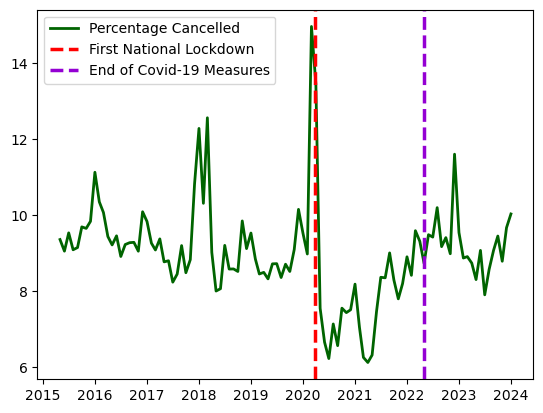

In [46]:
plt.plot(cancel_scotland["Date"], cancel_scotland["PercentageCancelled"], label="Percentage Cancelled", color="darkgreen", linewidth=2)
plt.axvline(x=np.datetime64("2020-03-26"), label="First National Lockdown", linestyle = "--", color = 'r', linewidth = 2.5)
plt.axvline(x=np.datetime64("2022-04-30"), label="End of Covid-19 Measures", linestyle = "--", color = 'darkviolet', linewidth = 2.5)

plt.legend()
#goes into q2 intro 

In [49]:
cancellations_scotland_beforecovid

,Date,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,2015-05-01,28810,2695,1057,853,523,262
1,2015-06-01,30941,2800,1194,870,449,287
2,2015-07-01,27725,2642,1083,854,457,248
3,2015-08-01,28948,2630,1080,912,491,147
4,2015-09-01,30938,2829,1122,1000,535,172
5,2015-10-01,31487,3050,1198,1075,582,195
6,2015-11-01,31739,3062,1265,1062,582,153
7,2015-12-01,29706,2921,1211,963,619,128
8,2016-01-01,28746,3197,1198,1005,868,126
9,2016-02-01,31177,3225,1234,1087,762,142


In [50]:
cancellations_scotland_aftercovid

,Date,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
59,2020-04-01,3406,458,113,170,141,34
60,2020-05-01,4120,311,82,161,53,15
61,2020-06-01,6984,465,114,242,76,33
62,2020-07-01,11224,699,185,345,143,26
63,2020-08-01,13831,987,298,468,158,63
64,2020-09-01,17056,1120,326,540,199,55
65,2020-10-01,18142,1370,341,611,366,52
66,2020-11-01,17916,1332,381,552,332,67
67,2020-12-01,16740,1257,319,511,381,46
68,2021-01-01,11830,968,287,337,279,65


In [98]:
#mean of operations before covid
mean_operations_beforecovid = cancellations_scotland_beforecovid["TotalOperations"].mean()
#mean of cancelled operations before covid
mean_cancelled_beforecovid = cancellations_scotland_beforecovid["TotalCancelled"].mean()

#mean of operations after covid
mean_operations_aftercovid = cancellations_scotland_aftercovid["TotalOperations"].mean()
#mean of cancelled operations after covid
mean_cancelled_aftercovid = cancellations_scotland_aftercovid["TotalCancelled"].mean()

print(mean_operations_beforecovid, mean_cancelled_beforecovid, mean_operations_aftercovid, mean_cancelled_aftercovid)
#percentage of operations cancelled before covid
percentage_cancelled_beforecovid = mean_cancelled_beforecovid/mean_operations_beforecovid*100
#percentage of operations cancelled after covid
percentage_cancelled_aftercovid = mean_cancelled_aftercovid/mean_operations_aftercovid*100

print(percentage_cancelled_beforecovid, percentage_cancelled_aftercovid)

28650.77966101695 2677.576271186441 19098.17391304348 1636.8260869565217
9.345561631712334 8.570589494101416


((array([-2.26751093, -1.90574552, -1.6934328 , -1.53794117, -1.41266963,
         -1.30632291, -1.21299259, -1.12917851, -1.05262603, -0.98179205,
         -0.91557053, -0.85313927, -0.79386855, -0.73726396, -0.68292896,
         -0.63053958, -0.57982669, -0.53056337, -0.48255566, -0.43563558,
         -0.38965586, -0.34448587, -0.30000832, -0.25611675, -0.21271332,
         -0.16970714, -0.1270127 , -0.08454864, -0.04223656,  0.        ,
          0.04223656,  0.08454864,  0.1270127 ,  0.16970714,  0.21271332,
          0.25611675,  0.30000832,  0.34448587,  0.38965586,  0.43563558,
          0.48255566,  0.53056337,  0.57982669,  0.63053958,  0.68292896,
          0.73726396,  0.79386855,  0.85313927,  0.91557053,  0.98179205,
          1.05262603,  1.12917851,  1.21299259,  1.30632291,  1.41266963,
          1.53794117,  1.6934328 ,  1.90574552,  2.26751093]),
  array([20192, 24491, 24539, 24624, 25188, 25791, 26018, 26204, 26276,
         26383, 26890, 26932, 26941, 27153, 27204, 

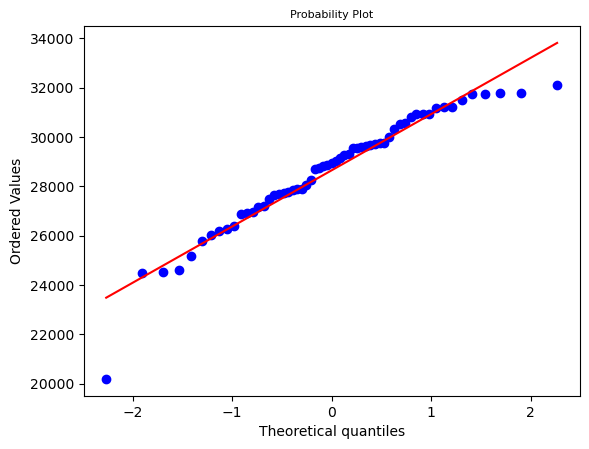

In [55]:
stats.probplot(cancellations_scotland_beforecovid["TotalOperations"], dist="norm", plot=pylab)

((array([-2.26751093, -1.90574552, -1.6934328 , -1.53794117, -1.41266963,
         -1.30632291, -1.21299259, -1.12917851, -1.05262603, -0.98179205,
         -0.91557053, -0.85313927, -0.79386855, -0.73726396, -0.68292896,
         -0.63053958, -0.57982669, -0.53056337, -0.48255566, -0.43563558,
         -0.38965586, -0.34448587, -0.30000832, -0.25611675, -0.21271332,
         -0.16970714, -0.1270127 , -0.08454864, -0.04223656,  0.        ,
          0.04223656,  0.08454864,  0.1270127 ,  0.16970714,  0.21271332,
          0.25611675,  0.30000832,  0.34448587,  0.38965586,  0.43563558,
          0.48255566,  0.53056337,  0.57982669,  0.63053958,  0.68292896,
          0.73726396,  0.79386855,  0.85313927,  0.91557053,  0.98179205,
          1.05262603,  1.12917851,  1.21299259,  1.30632291,  1.41266963,
          1.53794117,  1.6934328 ,  1.90574552,  2.26751093]),
  array([2074, 2237, 2255, 2278, 2295, 2310, 2318, 2343, 2345, 2348, 2411,
         2412, 2429, 2435, 2455, 2469, 2481, 248

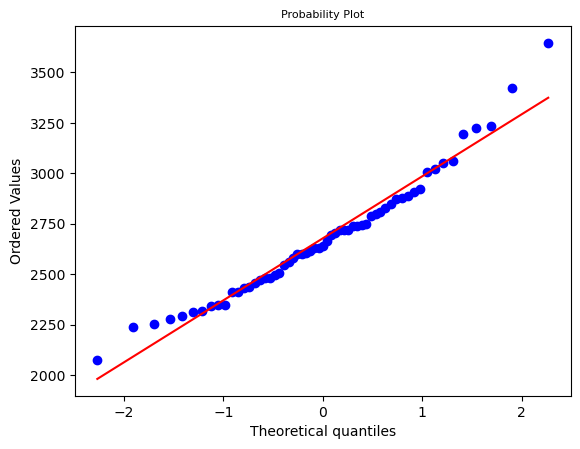

In [56]:
stats.probplot(cancellations_scotland_beforecovid["TotalCancelled"], dist="norm", plot=pylab)

((array([-2.17126809, -1.79548603, -1.57302822, -1.4089557 , -1.27591871,
         -1.16228371, -1.06195475, -0.97131345, -0.88802333, -0.81048029,
         -0.73752989, -0.66830933, -0.60215323, -0.53853445, -0.47702528,
         -0.41727113, -0.35897193, -0.30186881, -0.24573411, -0.19036382,
         -0.1355715 , -0.0811835 , -0.02703476,  0.02703476,  0.0811835 ,
          0.1355715 ,  0.19036382,  0.24573411,  0.30186881,  0.35897193,
          0.41727113,  0.47702528,  0.53853445,  0.60215323,  0.66830933,
          0.73752989,  0.81048029,  0.88802333,  0.97131345,  1.06195475,
          1.16228371,  1.27591871,  1.4089557 ,  1.57302822,  1.79548603,
          2.17126809]),
  array([ 3406,  4120,  6984, 11224, 11830, 12334, 13831, 16044, 16704,
         16740, 17056, 17150, 17755, 17836, 17916, 18142, 18392, 18630,
         18802, 19240, 19685, 19840, 20081, 20429, 20531, 20587, 20685,
         20837, 21094, 21536, 21895, 21919, 22000, 22014, 22329, 22688,
         23209, 23626,

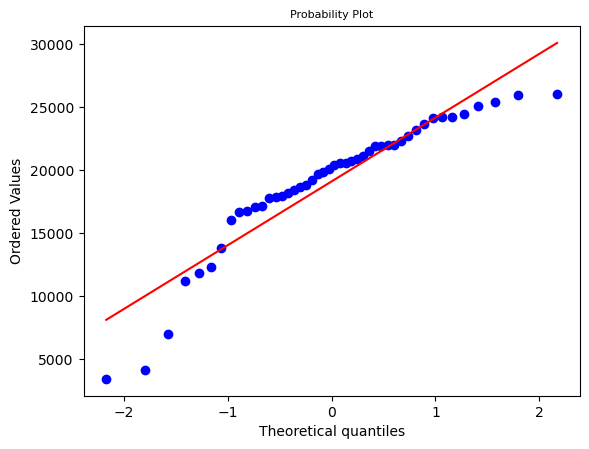

In [57]:
stats.probplot(cancellations_scotland_aftercovid["TotalOperations"], dist="norm", plot=pylab)

((array([-2.17126809, -1.79548603, -1.57302822, -1.4089557 , -1.27591871,
         -1.16228371, -1.06195475, -0.97131345, -0.88802333, -0.81048029,
         -0.73752989, -0.66830933, -0.60215323, -0.53853445, -0.47702528,
         -0.41727113, -0.35897193, -0.30186881, -0.24573411, -0.19036382,
         -0.1355715 , -0.0811835 , -0.02703476,  0.02703476,  0.0811835 ,
          0.1355715 ,  0.19036382,  0.24573411,  0.30186881,  0.35897193,
          0.41727113,  0.47702528,  0.53853445,  0.60215323,  0.66830933,
          0.73752989,  0.81048029,  0.88802333,  0.97131345,  1.06195475,
          1.16228371,  1.27591871,  1.4089557 ,  1.57302822,  1.79548603,
          2.17126809]),
  array([ 311,  458,  465,  699,  870,  968,  987, 1111, 1120, 1141, 1257,
         1269, 1332, 1370, 1385, 1428, 1462, 1544, 1582, 1605, 1609, 1643,
         1712, 1714, 1732, 1733, 1854, 1910, 1911, 1973, 2000, 2003, 2014,
         2080, 2100, 2105, 2109, 2216, 2229, 2254, 2264, 2277, 2286, 2369,
         2

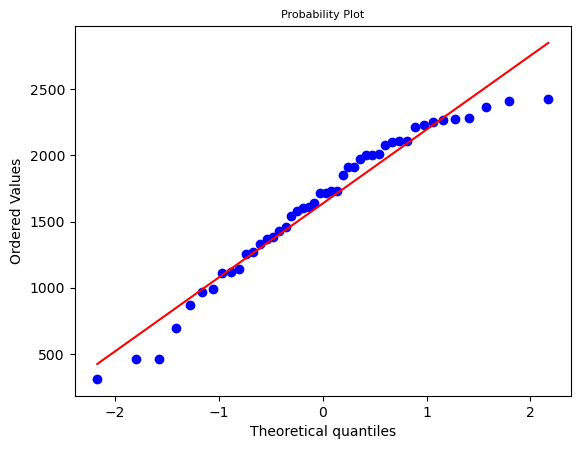

In [58]:
stats.probplot(cancellations_scotland_aftercovid["TotalCancelled"], dist="norm", plot=pylab)

((array([-2.47942824, -2.14520323, -1.95216821, -1.81255896, -1.7013275 ,
         -1.60787233, -1.52666322, -1.45443258, -1.38908124, -1.32917669,
         -1.27369559, -1.22188015, -1.17315267, -1.1270621 , -1.08324913,
         -1.04142252, -1.00134275, -0.96281023, -0.92565673, -0.88973902,
         -0.85493403, -0.82113512, -0.78824922, -0.75619452, -0.72489864,
         -0.6942972 , -0.66433256, -0.63495292, -0.60611144, -0.57776559,
         -0.54987659, -0.5224089 , -0.49532986, -0.4686093 , -0.44221924,
         -0.41613366, -0.39032825, -0.36478022, -0.33946812, -0.31437171,
         -0.28947177, -0.26475006, -0.24018912, -0.21577225, -0.19148336,
         -0.16730693, -0.14322791, -0.11923166, -0.09530388, -0.07143055,
         -0.04759787, -0.0237922 ,  0.        ,  0.0237922 ,  0.04759787,
          0.07143055,  0.09530388,  0.11923166,  0.14322791,  0.16730693,
          0.19148336,  0.21577225,  0.24018912,  0.26475006,  0.28947177,
          0.31437171,  0.33946812,  0.

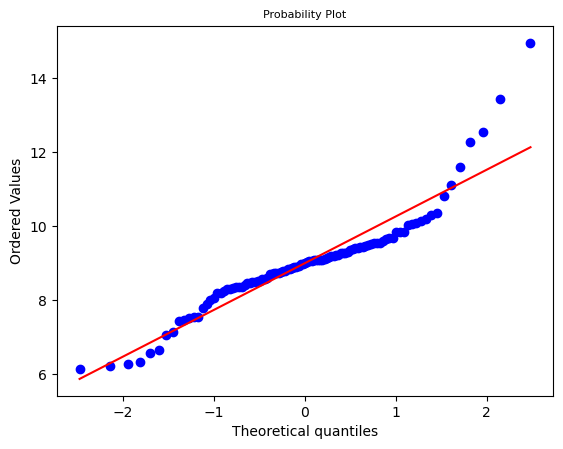

In [61]:
stats.probplot(cancel_scotland["PercentageCancelled"], dist="norm", plot=pylab)

In [63]:

g1 = cancellations_scotland_beforecovid["TotalOperations"]
g2 = cancellations_scotland_aftercovid["TotalOperations"]
 
v1 = np.var(g1, ddof=1)
v2 = np.var(g2, ddof=1)
 
# Calculate the F-statistic
f_val = v1 / v2
 
# Calculate the degrees of freedom
df1 = len(g1) - 1
df2 = len(g2) - 1
 
# Calculate the p-value
v_val = stats.f.cdf(f_val, df1, df2)
 
# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_val)
print("p-value:", v_val)

Degree of freedom 1: 58
Degree of freedom 2: 45
F-statistic: 0.1926710440233083
p-value: 4.8646446142024885e-09


[28278.22033898 28910.44067797 28127.23728814 ... 28879.72881356
 28666.06779661 28638.71186441]
Confidence interval
0.025    28054.071186
0.975    29207.191525
dtype: float64


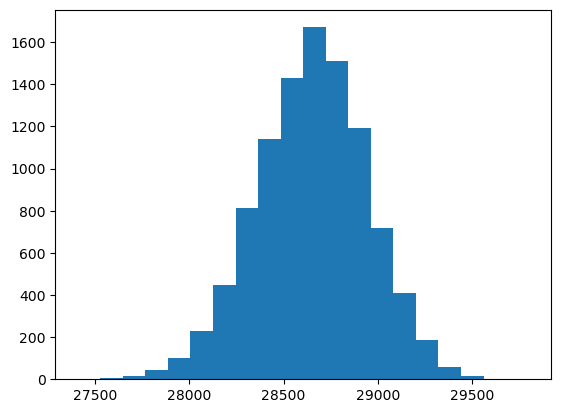

In [68]:
operations = cancellations_scotland_beforecovid['TotalOperations']
k = 10000
n = len(operations)

x_star_tilde = np.zeros(k)
for i in range(k):
    x_star = operations.sample(n, replace=True)
    x_star_tilde[i] = x_star.mean()
    
print(x_star_tilde)
plt.hist(x_star_tilde, 20)
print("Confidence interval")
print(pd.Series(x_star_tilde).quantile([0.025, 0.975]))

[28017.91737288 29230.54237288] 300.97574454544866


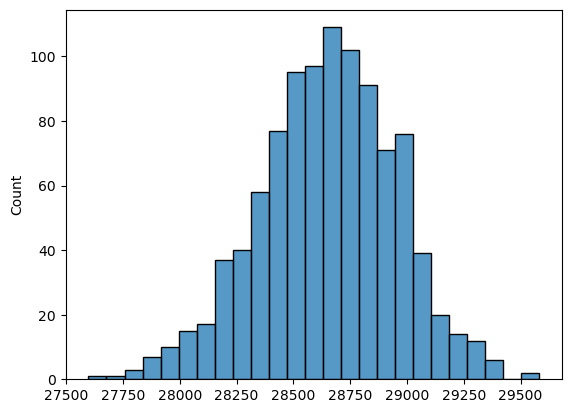

In [89]:
def bootstrap(x, k=1000, estimator=np.mean, quantiles=[0.025, 0.975], plot=False):
    n = len(x)
    x_star_est = np.zeros(k)
    for i in range(k):
        x_star = np.random.choice(x, n, replace=True)
        x_star_est[i] = estimator(x_star)
        
    if (plot):
        sns.histplot(x_star_est)
    return(np.quantile(x_star_est, quantiles), np.std(x_star_est))

ci, std = bootstrap(operations, plot=True)
print(ci, std)

299.19315625581993 294.47500934996293 [28063.53389831 29223.98983051]


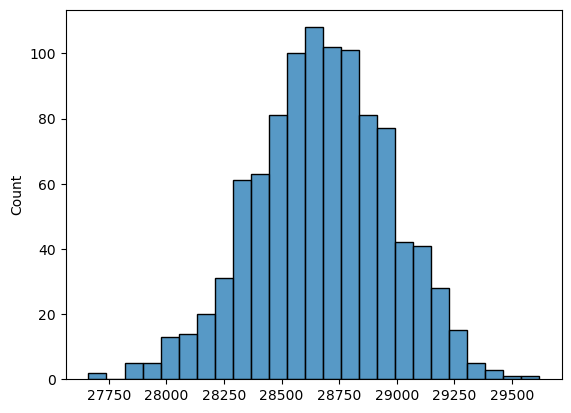

In [70]:
SEM = np.std(operations, ddof=1)/np.sqrt(len(operations))
ci, std = bootstrap(operations, plot=True)
print(SEM, std, ci)

In [97]:
SEM = operations.std(ddof=1)/np.sqrt(len(operations))
xbar = operations.mean()

# We now need the z-critical values for 2.5% and 99.5%
z = norm.isf(0.025)
ci = [xbar - SEM*z, xbar + SEM*z]
print(ci)

# p value for mean of operations before covid
t_val = (xbar - mean_operations_aftercovid)/(SEM)
print(mean_operations_beforecovid)
print(mean_operations_aftercovid - xbar)
print(SEM)
print(t_val)

[28064.37185033468, 29237.18747169922]
28650.77966101695
-9552.60574797347
299.19315625581993
31.927888550384086


In [76]:
cancellations = cancellations_scotland_beforecovid["TotalCancelled"]

In [77]:
SEM = cancellations.std(ddof=1)/np.sqrt(len(cancellations))
xbar = cancellations.mean()

# We now need the z-critical values for 2.5% and 99.5%
z = norm.isf(0.025)
ci = [xbar - SEM*z, xbar + SEM*z]
ci

[2599.459580973016, 2755.692961399866]

<Axes: xlabel='TotalCancelled', ylabel='Count'>

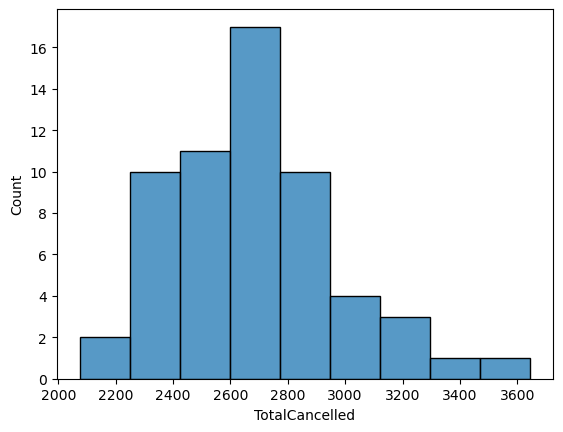

In [78]:
sns.histplot(cancellations)

<Axes: xlabel='TotalCancelled', ylabel='Count'>

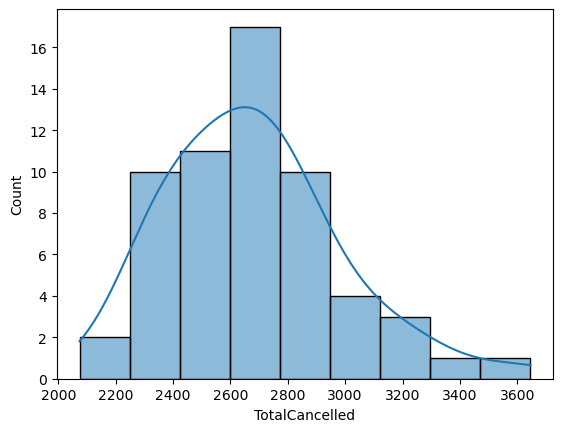

In [79]:
sns.histplot(cancellations, kde=True)

<Axes: xlabel='TotalOperations', ylabel='Count'>

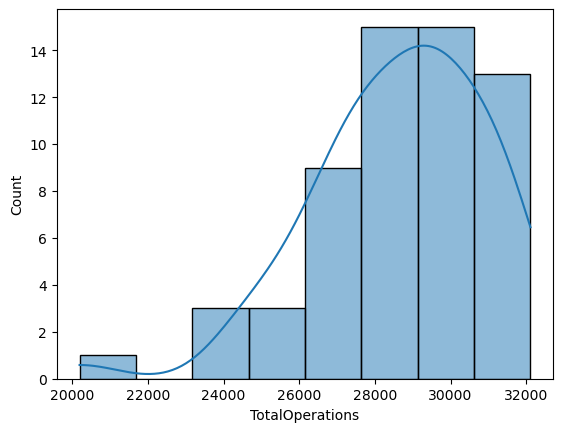

In [81]:
sns.histplot(operations,kde=True)

In [82]:
cancel_scotland["PercentageCancelled"]

0       9.354391
1       9.049481
2       9.529306
3       9.085256
4       9.144095
         ...    
100     9.069757
101     9.445891
102     8.784044
103     9.665499
104    10.026462
Name: PercentageCancelled, Length: 105, dtype: float64

In [83]:
cancel_scotland

,Date,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Season,PercentageCancelled
0,2015-05-01,28810,2695,1057,853,523,262,Spring,9.354391
1,2015-06-01,30941,2800,1194,870,449,287,Summer,9.049481
2,2015-07-01,27725,2642,1083,854,457,248,Summer,9.529306
3,2015-08-01,28948,2630,1080,912,491,147,Summer,9.085256
4,2015-09-01,30938,2829,1122,1000,535,172,Autumn,9.144095
...,...,...,...,...,...,...,...,...,...
100,2023-09-01,23209,2105,739,738,541,87,Autumn,9.069757
101,2023-10-01,24201,2286,775,797,580,134,Autumn,9.445891
102,2023-11-01,25922,2277,737,820,582,138,Autumn,8.784044
103,2023-12-01,20837,2014,677,725,515,97,Winter,9.665499


(array([9.10884917, 9.69464865]), 0.15165493062124905)


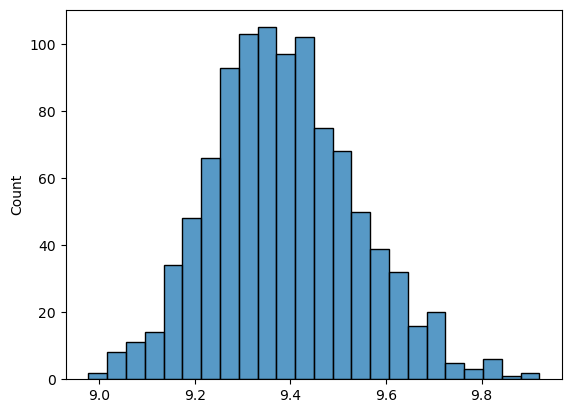

In [87]:
percentage_before = cancel_scotland[cancel_scotland["Date"] <= np.datetime64("2020-03-26") ]["PercentageCancelled"]
print(bootstrap(cancel_scotland[cancel_scotland["Date"] <= np.datetime64("2020-03-26") ]["PercentageCancelled"], plot=True))

In [88]:
SEM = percentage_before.std(ddof=1)/np.sqrt(len(percentage_before))
xbar = percentage_before.mean()

# We now need the z-critical values for 2.5% and 99.5%
z = norm.isf(0.025)
ci = [xbar - SEM*z, xbar + SEM*z]
ci

[9.08547406906599, 9.669341957771662]

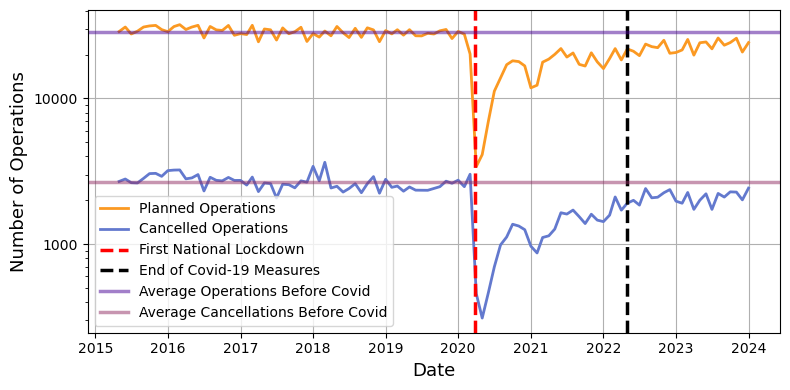

In [108]:
fig, ax = plt.subplots(figsize=(8,4))
# COLOURRR BLIND PALETTEEEE
sns.color_palette("tab10")
sns.lineplot(data=cancellations_scotland, x="Date", y="TotalOperations", label="Planned Operations", color = "#FB9922", linewidth=2)
sns.lineplot(data=cancellations_scotland, x="Date", y="TotalCancelled", label="Cancelled Operations", color="#6379CE", linewidth=2)
plt.ylabel("Number of Operations", fontsize=13)
ax.set(yscale="log")
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.axvline(x=np.datetime64("2020-03-26"), label="First National Lockdown", linestyle = "--", color = '#FF0000', linewidth = 2.5)
plt.axvline(x=np.datetime64("2022-04-30"), label="End of Covid-19 Measures", linestyle = "--", color = '000000', linewidth = 2.5)
plt.axhline(y=mean_operations_beforecovid, color='#460094', linestyle='-',label="Average Operations Before Covid", alpha=0.5, linewidth=2.5)
plt.axhline(y=mean_cancelled_beforecovid, color='#902C63', linestyle='-', label="Average Cancellations Before Covid", alpha=0.5, linewidth=2.5)
plt.xlabel("Date", fontsize=13)
plt.tight_layout()
plt.legend()
ax.grid()
plt.savefig('figure1.pdf')